# 1.	Data Cleaning and Preparation

In [1]:
# Load the dataset into a DataFrame 
import pandas as pd 
df=pd.read_csv("E:/DS ASSIGNMENTS/MLR/ToyotaCorolla - MLR.csv") 
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


#  Exploratory Data Analysis

In [2]:
# Data Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [3]:
# Data Description
print(df.describe())


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [4]:
# Check for missing values
print(df.isnull().sum())


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [5]:
#Find categorical variables
data_types = df.dtypes

# Initialize an empty list to store categorical columns
categorical_columns = []

# Iterate through the columns and find categorical columns
for column, dtype in data_types.items():
    if dtype == 'object' or pd.api.types.is_categorical_dtype(dtype):
        categorical_columns.append(column)

# Print the categorical columns found
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
['Fuel_Type']


# Visualizations

[]

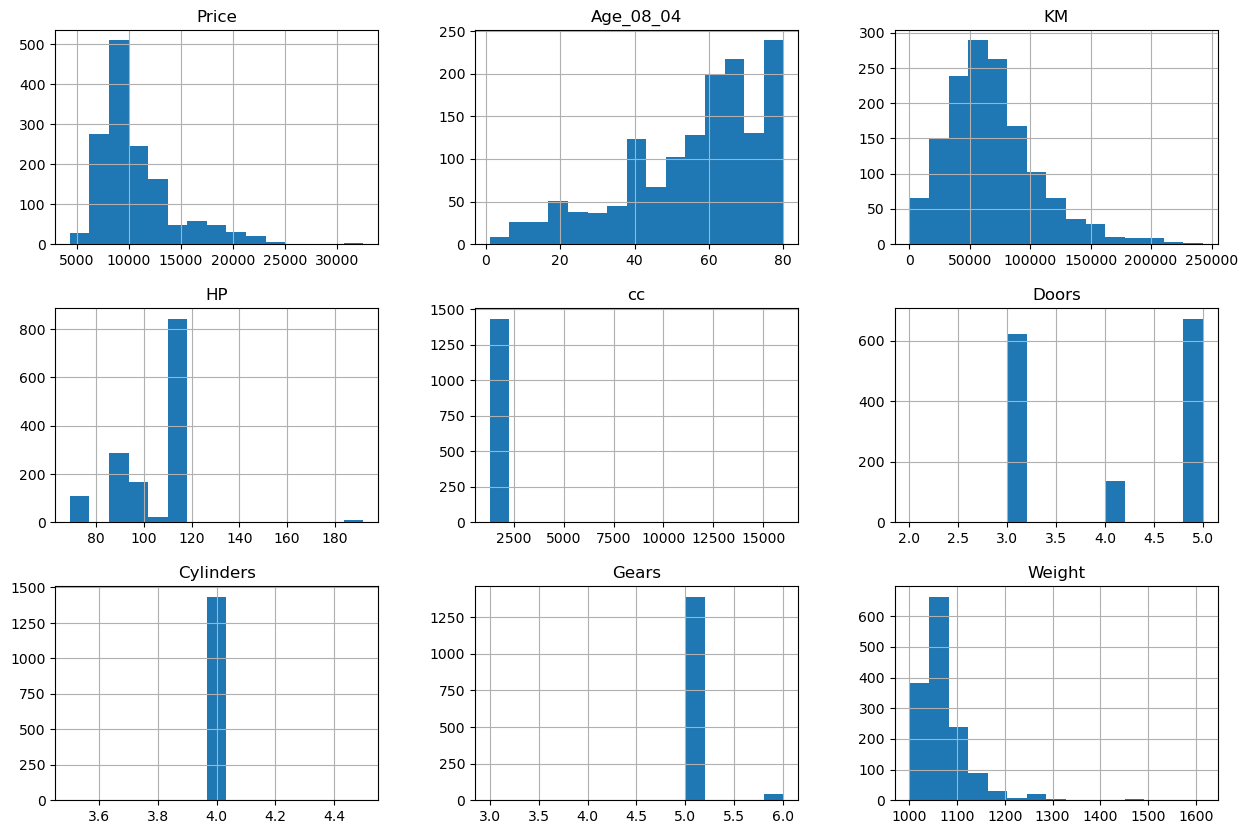

In [6]:
# Histograms for numerical variables 
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.plot()

[]

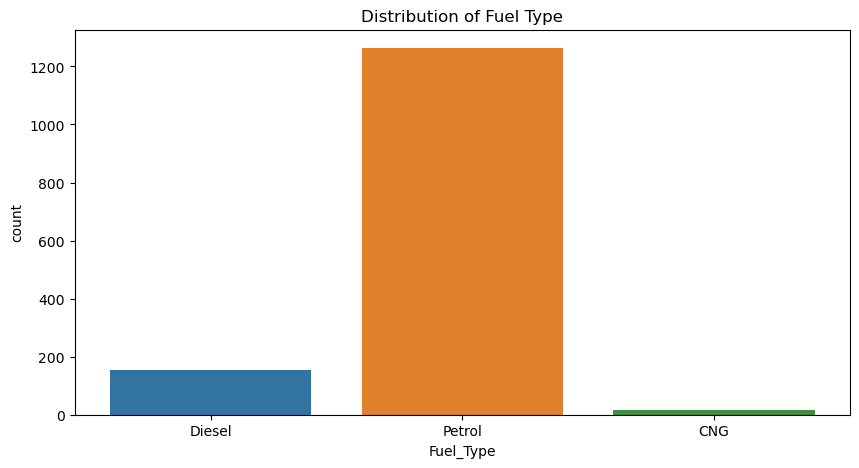

In [7]:
# Bar plot for the categorical variable Fuel_Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Distribution of Fuel Type')
plt.plot()

C:\Users\patil\anaconda3\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[]

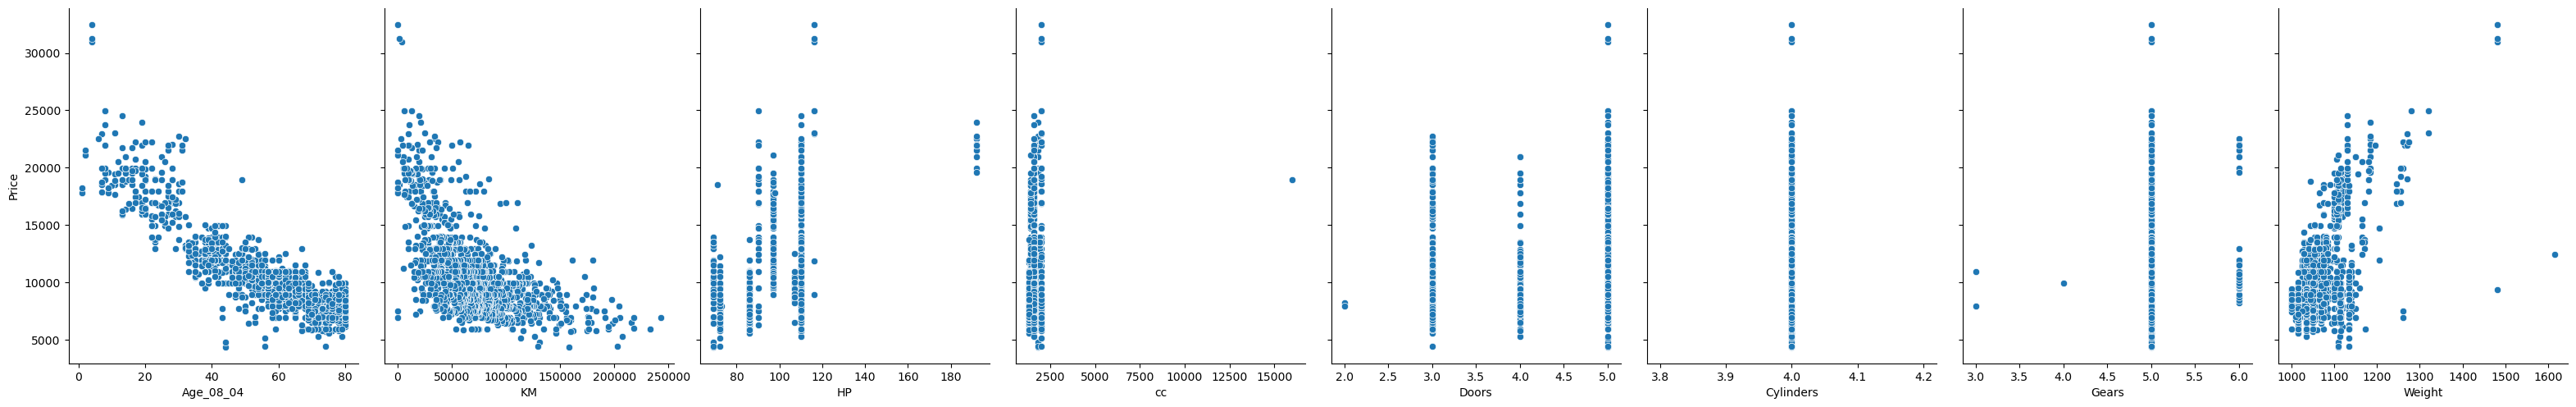

In [8]:
# Scatter plots for Price vs other numerical variables
sns.pairplot(df, x_vars=numerical_cols[1:], y_vars='Price', height=5, aspect=0.8)
plt.plot()

In [9]:
#: Data transformation of OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
category_data = df["Fuel_Type"]
# Initialize OneHotEncoder
encoder = OneHotEncoder()
# Fit-transform the data
encoded_data = encoder.fit_transform(df[['Fuel_Type']])
# Create a DataFrame with the encoded fuel types
encoded_data = encoder.fit_transform(category_data.values.reshape(-1, 1))
# Convert the encoded sparse matrix to a DataFrame with column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Fuel_Type']))

# Drop the original 'category' column from the original DataFrame
df.drop(columns=['Fuel_Type'], inplace=True)

# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([df, encoded_df], axis=1)

print(data_encoded)

      Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500         23  46986   90          0  2000      3          4      5   
1     13750         23  72937   90          0  2000      3          4      5   
2     13950         24  41711   90          0  2000      3          4      5   
3     14950         26  48000   90          0  2000      3          4      5   
4     13750         30  38500   90          0  2000      3          4      5   
...     ...        ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500         69  20544   86          0  1300      3          4      5   
1432  10845         72  19000   86          0  1300      3          4      5   
1433   8500         71  17016   86          0  1300      3          4      5   
1434   7250         70  16916   86          0  1300      3          4      5   
1435   6950         76      1  110          0  1600      5          4      5   

      Weight  Fuel_Type_CNG  Fuel_Type_

In [10]:
# Data partion
Y = df["Price"]
X = data_encoded.iloc[:,1:]
X.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,0.0,1.0,0.0
1,23,72937,90,0,2000,3,4,5,1165,0.0,1.0,0.0
2,24,41711,90,0,2000,3,4,5,1165,0.0,1.0,0.0
3,26,48000,90,0,2000,3,4,5,1165,0.0,1.0,0.0
4,30,38500,90,0,2000,3,4,5,1170,0.0,1.0,0.0


In [11]:
# Data transformation 
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X  = SS.fit_transform(X)
SS_X  = pd.DataFrame(SS_X)
SS_X.columns = list(X)
SS_X.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,-0.109454,2.874807,-2.710874


# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test   = train_test_split(X,Y,test_size=0.2,random_state=42)

# 3.Build a multiple linear regression model using the training dataset. 
#Interpret the coefficients of the model.
Build minimum of 3 different models.

In [13]:
# Model 1: Using all features
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model1 = sm.OLS(Y_train, X_train_sm).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:30:26   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -120.8305      2.887  

In [14]:
# Model 2: Using selected features
X_train_selected = X_train[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']]
X_train_selected_sm = sm.add_constant(X_train_selected)
model2 = sm.OLS(Y_train, X_train_selected_sm).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1047.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:30:26   Log-Likelihood:                -9884.4
No. Observations:                1148   AIC:                         1.978e+04
Df Residuals:                    1140   BIC:                         1.983e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8223.9715   1458.590     -5.638      0.0

In [15]:
# Model 3: Using interaction terms
X_train_interaction = X_train.copy()
X_train_interaction['Age_KM'] = X_train['Age_08_04'] * X_train['KM']
X_train_interaction_sm = sm.add_constant(X_train_interaction)
model3 = sm.OLS(Y_train, X_train_interaction_sm).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     758.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:30:27   Log-Likelihood:                -9817.8
No. Observations:                1148   AIC:                         1.966e+04
Df Residuals:                    1136   BIC:                         1.972e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -149.4634      4.060  

# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [17]:
# Calculate the mean squared error (MSE) for each model
import numpy as np
mse1 = np.mean(model1.resid ** 2)
mse2 = np.mean(model2.resid ** 2)
mse3 = np.mean(model3.resid ** 2)



# Calculate the root mean squared error (RMSE) for each model
rmse1 = np.sqrt(np.mean(model1.resid ** 2))
rmse2 = np.sqrt(np.mean(model2.resid ** 2))
rmse3 = np.sqrt(np.mean(model3.resid ** 2))


# Calculate other evaluation metrics such as R-squared and adjusted R-squared
r_squared1 = model1.rsquared
adjusted_r_squared1 = model1.rsquared_adj
r_squared2 = model2.rsquared
adjusted_r_squared2 = model2.rsquared_adj
r_squared3 = model3.rsquared
adjusted_r_squared3 = model3.rsquared_adj

# Print the results
print(" Model 1: evaluation metrics on the testing dataset \n ") 
print(" - R-squared:", r_squared1)
print(" - Adjusted R-squared:", adjusted_r_squared1)
print(" - Mean square error:", mse1)
print(" - Root Mean square error:", rmse1,"\n") 
print(" Model 2: evaluation metrics on the testing dataset \n ") 
print(" - R-squared:", r_squared2)
print(" - Adjusted R-squared:", adjusted_r_squared2)
print(" - Mean square error:", mse2)
print(" - Root Mean square error:", rmse2,"\n") 
print(" Model 3: evaluation metrics on the testing dataset \n ") 
print(" - R-squared:", r_squared3)
print(" - Adjusted R-squared:", adjusted_r_squared3)
print(" - Mean square error:", mse3)
print(" - Root Mean square error:", rmse3,"\n") 




 Model 1: evaluation metrics on the testing dataset 
 
 - R-squared: 0.8702643169608926
 - Adjusted R-squared: 0.8691232819297658
 - Mean square error: 1698694.1713486249
 - Root Mean square error: 1303.339622411835 

 Model 2: evaluation metrics on the testing dataset 
 
 - R-squared: 0.8653681200030667
 - Adjusted R-squared: 0.8645414330206295
 - Mean square error: 1762802.526422584
 - Root Mean square error: 1327.7057378887025 

 Model 3: evaluation metrics on the testing dataset 
 
 - R-squared: 0.8801240378680817
 - Adjusted R-squared: 0.8789632671080015
 - Mean square error: 1569595.9152341713
 - Root Mean square error: 1252.8351508615056 



# 5.Apply Lasso and Ridge methods on the model.

In [18]:
# Apply and evaluate linear regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(Y_train,Y_pred_train)
mse_2 = mean_squared_error(Y_test,Y_pred_test)

import numpy as np
training_error = np.sqrt(mse_1)
test_error = np.sqrt(mse_2)
print("Linear Regression: Training Error", training_error.round(2))
print("Linear Regression: Test Error", test_error.round(2))


Linear Regression: Training Error 1303.34
Linear Regression: Test Error 1484.27


In [19]:
# cross validation
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

cv_training_error = []
cv_test_error = []

for i in range(1,500,1):
    X_train,X_test,Y_train,Y_test   = train_test_split(SS_X,Y,random_state=i)
    LR.fit(X_train,Y_train)
    y_pred_train = LR.predict(X_train)
    y_pred_test = LR.predict(X_test)
    cv_training_error.append(np.sqrt(mean_squared_error(Y_train,y_pred_train)))
    cv_test_error.append(np.sqrt(mean_squared_error(Y_test,y_pred_test)))
    
# Collect results
print("Crossvalidation: Training Error",np.mean(cv_training_error).round(2))
print("Crossvalidation: Test Error",np.mean(cv_test_error).round(2))

LR_coef = LR.coef_

Crossvalidation: Training Error 1316.51
Crossvalidation: Test Error 1925.06


In [22]:
# Apply and evaluate Lasso regression
from sklearn.linear_model import Lasso
LS = Lasso(alpha=100)

X_train,X_test,Y_train,Y_test = train_test_split(SS_X,Y,random_state=500)


LS.fit(X_train,Y_train)
Y_pred_train = LS.predict(X_train)
Y_pred_test = LS.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(Y_train,Y_pred_train)
mse_2 = mean_squared_error(Y_test,Y_pred_test)

import numpy as np
training_error = np.sqrt(mse_1)
test_error = np.sqrt(mse_2)

# Collect results
print("Lasso Regression: Training Error", training_error.round(2))
print("Lasso Regression: Test Error", test_error.round(2))

pd.concat([pd.DataFrame(list(SS_X)),pd.DataFrame(LR.coef_),pd.DataFrame(RR.coef_)],axis=1)

Lasso Regression: Training Error 1267.91
Lasso Regression: Test Error 1597.27


,0,0,0
0,Age_08_04,-2.344363e+03,-1982.789778
1,KM,-6.182055e+02,-670.388197
2,HP,8.470136e+02,289.602720
3,Automatic,9.577474e+01,27.475872
4,cc,-1.359798e+03,-325.133444
5,Doors,7.767200e+01,-28.469517
6,Cylinders,1.136868e-13,0.000000
7,Gears,1.136292e+02,111.613909
8,Weight,8.276190e+02,1408.604197
9,Fuel_Type_CNG,-1.721053e+02,-79.641624


In [21]:
# Apply and evaluate Ridge regression
from sklearn.linear_model import Ridge
RR = Ridge(alpha=100.0)

RR.fit(X_train,Y_train)
Y_pred_train = RR.predict(X_train)
Y_pred_test = RR.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(Y_train,Y_pred_train)
mse_2 = mean_squared_error(Y_test,Y_pred_test)

import numpy as np
training_error = np.sqrt(mse_1)
test_error = np.sqrt(mse_2)

# Collect results
print("Ridge Regression: Training Error", training_error.round(2))
print("Ridge Regression: Test Error", test_error.round(2))


pd.concat([pd.DataFrame(list(SS_X)),pd.DataFrame(LR.coef_),pd.DataFrame(RR.coef_)],axis=1)


Ridge Regression: Training Error 1253.39
Ridge Regression: Test Error 1733.37


,0,0,0
0,Age_08_04,-2.344363e+03,-1982.789778
1,KM,-6.182055e+02,-670.388197
2,HP,8.470136e+02,289.602720
3,Automatic,9.577474e+01,27.475872
4,cc,-1.359798e+03,-325.133444
5,Doors,7.767200e+01,-28.469517
6,Cylinders,1.136868e-13,0.000000
7,Gears,1.136292e+02,111.613909
8,Weight,8.276190e+02,1408.604197
9,Fuel_Type_CNG,-1.721053e+02,-79.641624


In [24]:
# Apply and evaluate Ridge and Lasso regression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
ridge = Ridge(alpha=100.0)
lasso = Lasso(alpha=100.0)

ridge.fit(X_train, Y_train)
lasso.fit(X_train, Y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

ridge_mse = mean_squared_error(Y_test, ridge_pred)
ridge_rmse = ridge_mse ** 0.5
ridge_mae = mean_absolute_error(Y_test, ridge_pred)
ridge_r2 = r2_score(Y_test, ridge_pred)

lasso_mse = mean_squared_error(Y_test, lasso_pred)
lasso_rmse = lasso_mse ** 0.5
lasso_mae = mean_absolute_error(Y_test, lasso_pred)
lasso_r2 = r2_score(Y_test, lasso_pred)

# Collect results in a DataFrame for comparison
ridge_lasso_results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso'],
    'MSE': [ridge_mse, lasso_mse],
    'RMSE': [ridge_rmse, lasso_rmse],
    'MAE': [ridge_mae, lasso_mae],
    'R-squared': [ridge_r2, lasso_r2],
    'Coefficients': [ridge.coef_, lasso.coef_]
})

ridge_lasso_results


,Model,MSE,RMSE,MAE,R-squared,Coefficients
0,Ridge,3.004555e+06,1733.365131,1051.859363,0.777779,"[-1982.7897777532278, -670.3881968611333, 289...."
1,Lasso,2.551266e+06,1597.268305,1030.102318,0.811305,"[-2148.665395937727, -595.6236120594791, 187.6..."
